# **Credit Risk Modeling - PD Model**

We will now concentrate on using the preprocessed datasets to build the probability default model.

### **Import libraries**

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stat
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Load the data** 

In [2]:
# load the four datasets
loan_inputs_train = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_train.csv', index_col = 0, header = 0)
loan_targets_train = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_train.csv', index_col = 0, header = 0)
loan_inputs_test = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_inputs_test.csv', index_col = 0, header = 0)
loan_targets_test = pd.read_csv('C:/Users/Aylan/Documents/IT/Datasets/loan_data_targets_test.csv', index_col = 0, header = 0)

# display the first 5 rows of the "loan_inputs_train" dataframe
pd.options.display.max_columns = None
loan_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mth_since_earliest_cr_line,issue_date,mth_issue_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:educ_smb_wedd_renen_mov_house,purpose:oth_med_vacation,purpose:majorpurch_car_homeimpr,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mth_issue_date_factor,mth_issue_date:<38,mth_issue_date:38-39,mth_issue_date:40-41,mth_issue_date:42-48,mth_issue_date:49-52,mth_issue_date:53-64,mth_issue_date:65-84,mth_issue_date:>84,int_rate_factor,int_rate: < 9.548,int_rate:9.548 - 12.025,int_rate:12.025 - 15.74,int_rate:15.74 - 20.281,int_rate: > 20.281,funded_amnt_factor,annual_inc_factor,annual_in

In [3]:
# display the first 5 rows of the "loan_inputs_train" dataframe
# pd.options.display.max_columns = None
loan_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,1
36159,0


In [4]:
# diplay the shape of each dataframe
print('The shape of the "loan_inputs_train" dataframe is:', loan_inputs_train.shape)
print('The shape of the "loan_targets_train" dataframe is:', loan_targets_train.shape)
print('The shape of the "loan_inputs_test" dataframe is:', loan_inputs_test.shape)
print('The shape of the "loan_targets_test" dataframe is:', loan_targets_test.shape)

The shape of the "loan_inputs_train" dataframe is: (373028, 328)
The shape of the "loan_targets_train" dataframe is: (373028, 1)
The shape of the "loan_inputs_test" dataframe is: (93257, 315)
The shape of the "loan_targets_test" dataframe is: (93257, 1)


**Selecting the features**

In [5]:
pd.options.display.max_columns = None
loan_inputs_train.columns.values

array(['Unnamed: 0.1', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       've

In [6]:
# now we can start building the probability of default model
# first let's select only the independante variables we need 
# that's because when we build a PD model we usually prefer only a small set of variables
inputs_train_with_ref_cat = loan_inputs_train.loc[:, 
                                             ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
                                              'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                              'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
                                              'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR','addr_state:WI_MT', 'addr_state:IL_CT','addr_state:KS_SC_CO_VT_AK_MS', 
                                              'addr_state:WV_NH_WY_DC_ME_ID', 'addr_state:NY', 'addr_state:CA', 'addr_state:TX', 'verification_status:Not Verified', 
                                              'verification_status:Source Verified', 'verification_status:Verified', 'purpose:educ_smb_wedd_renen_mov_house', 
                                              'purpose:credit_card', 'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:majorpurch_car_homeimpr',
                                               'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length_int:0', 'emp_length_int:1',
                                              'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'mth_issue_date:<38',
                                              'mth_issue_date:38-39', 'mth_issue_date:40-41', 'mth_issue_date:42-48', 'mth_issue_date:49-52',
                                              'mth_issue_date:53-64', 'mth_issue_date:65-84', 'mth_issue_date:>84', 'int_rate: < 9.548', 'int_rate:9.548 - 12.025', 
                                              'int_rate:12.025 - 15.74', 'int_rate:15.74 - 20.281', 'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140',
                                              'mth_since_earliest_cr_line:141-164', 'mth_since_earliest_cr_line:165-247','mth_since_earliest_cr_line:248-270',
                                              'mth_since_earliest_cr_line:271-352', 'mth_since_earliest_cr_line:>352', 'delinq_2yrs:0','delinq_2yrs:1-3', 'delinq_2yrs:>=4',
                                              'inq_last_6mths: 0', 'inq_last_6mths: 1-2', 'inq_last_6mths: 3-6', 'inq_last_6mths: > 6', 'open_acc:0', 'open_acc:1-3',
                                              'open_acc:4-12', 'open_acc:13-17', 'open_acc:18-22', 'open_acc:23-25', 'open_acc:26-30', 'open_acc:>=31', 'pub_rec:0-2',
                                              'pub_rec:3-4', 'pub_rec:>=5', 'total_acc:<=27', 'total_acc:28-51', 'total_acc:>=52', 'acc_now_delinq:0',
                                              'acc_now_delinq:>=1', 'mths_since_last_record: Missing', 'mths_since_last_record: 0-2', 'mths_since_last_record: 3-20',
                                              'mths_since_last_record: 21-31', 'mths_since_last_record: 32-80', 'mths_since_last_record: 81-86', 'mths_since_last_record: > 86', 
                                              'total_rev_hi_lim:<=5K', 'total_rev_hi_lim:5K-10K', 'total_rev_hi_lim:10K-20K', 
                                              'total_rev_hi_lim:20K-30K', 'total_rev_hi_lim:30K-40K', 'total_rev_hi_lim:40K-55K', 'total_rev_hi_lim:55K-95K', 
                                              'total_rev_hi_lim:>95K', 'annual_inc:<20K', 'annual_inc:20K-30K', 'annual_inc:30K-40K', 'annual_inc:40K-50K',
                                              'annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 'annual_inc:80K-90K', 'annual_inc:90K-100K',
                                              'annual_inc:100K-120K', 'annual_inc:120K-140K', 'annual_inc:>140K', 'dti: <= 1.4', 'dti: 1.4-3.5', 'dti: 3.5-7.7', 
                                              'dti: 7.7-10.5', 'dti: 10.5-16.1', 'dti: 16.1-20.3', 'dti: 20.3-21.7', 'dti: 21.7-22.4', 'dti: 22.4-35', 'dti: > 35',
                                              'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56',
                                              'mths_since_last_delinq:>=57']]
                                              


# at this point, the variables we decided to include the PD model are represented by their dummy variables
# now we must remove 1 dummy for each original variable, 
# otherwise we will fall into the so called "dummy variable trap"
# the dummies to be removed are the reference categories
# I stored them in variable I named "ref_cat"
ref_cat = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'verification_status:Source Verified',
           'purpose:educ_smb_wedd_renen_mov_house', 'initial_list_status:f', 'term:60', 'emp_length_int:0', 'mth_issue_date:>84',
           'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140', 'delinq_2yrs:>=4', 'inq_last_6mths: > 6', 'pub_rec:0-2', 'total_acc:<=27', 
           'open_acc:0', 'acc_now_delinq:0', 'total_rev_hi_lim:<=5K', 'annual_inc:<20K', 'dti: > 35', 
           'mths_since_last_record: 0-2', 'mths_since_last_delinq:0-3']

# drop the reference cataegories from the "inputs_train_ref_cat" dataframe
inputs_train_without_ref_cat = inputs_train_with_ref_cat.drop(ref_cat, axis = 1)

# display the first few rows of the "inputs_train_ref_cat" dataframe
inputs_train_without_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Not Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:majorpurch_car_homeimpr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mth_issue_date:<38,mth_issue_date:38-39,mth_issue_date:40-41,mth_issue_date:42-48,mth_issue_date:49-52,mth_issue_date:53-64,mth_issue_date:65-84,int_rate: < 9.548,int_rate:9.548 - 12.025,int_rate:12.025 - 15.74,int_rate:15.74 - 20.281,mth_since_earliest_cr_line:141-164,mth_since_earliest_cr_line:165-247,mth_since_earliest_cr_line:248-270,mth_since_earliest_cr_line:271-352,mth_since_earliest_cr_line:>352,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths: 0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,open_acc:1-3,open_acc:4-12,open_acc:13-17,open_acc:18-22,open_acc:23-25,open_acc:26-30,open_acc:>=31,pub_rec:3-4,pub_rec:>=5,total_acc:28-51,total_acc:>=52,acc_now_delinq:>=1,mths_since_last_record: Missing,mths_since_last_record: 3-20,mths_since_last_record: 21-31,mths_since_last_record: 32-80,mths_since_last_record: 81-86,mths_since_last_record: > 86,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti: <= 1.4,dti: 1.4-3.5,dti: 3.5-7.7,dti: 7.7-10.5,dti: 10.5-16.1,dti: 16.1-20.3,dti: 20.3-21.7,dti: 21.7-22.4,dti: 22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


### **PD Model Estimation**
**Logistic Regression**

In [7]:
# now it is time to build our model
# we will use the logisitic regression model
reg = LogisticRegression()
reg.fit(inputs_train_without_ref_cat, loan_targets_train) # fit the model

C:\Users\Aylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# print the model's coefficients
reg.coef_

array([[ 1.14311463,  0.90928268,  0.70914269,  0.51731829,  0.32712521,
         0.1270258 ,  0.07924879,  0.08761797,  0.03323466,  0.05979983,
         0.06960328,  0.13040878,  0.10566564,  0.16108659,  0.2296432 ,
         0.2586139 ,  0.31396083,  0.50580885,  0.06764929,  0.03919598,
         0.22583719,  0.09296526,  0.00438653,  0.34145469,  0.22410153,
         0.21419088,  0.29242275,  0.06145612,  0.06860498,  0.10117017,
         0.12289246,  0.09608871,  0.06545761,  0.12619658,  1.49620218,
         1.17194272,  1.01377822,  0.74651504,  0.51474644,  0.2215638 ,
        -0.07092631,  0.86553252,  0.52746331,  0.29333505,  0.09650805,
         0.06376488,  0.03704285,  0.0877077 ,  0.12937383,  0.1250869 ,
         0.06912132,  0.04354016,  0.62954019,  0.48242802,  0.26264346,
        -0.01816421, -0.1139983 , -0.13029668, -0.15141494, -0.1365732 ,
        -0.15782187, -0.21002708,  0.16723498,  0.1164736 , -0.03126755,
         0.04075577,  0.17764245,  0.33461499,  0.4

In [9]:
# print the model's intercept
reg.intercept_

array([-1.26593612])

In [10]:
# format this information to have in a dataframe
pd.options.display.max_rows = None 
feature_name = inputs_train_without_ref_cat.columns.values
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.265936
1,grade:A,1.143115
2,grade:B,0.909283
3,grade:C,0.709143
4,grade:D,0.517318
5,grade:E,0.327125
6,grade:F,0.127026
7,home_ownership:OWN,0.079249
8,home_ownership:MORTGAGE,0.087618
9,addr_state:NM_VA,0.033235


**Build a logistic regression model with p-values**

In [11]:
# here, we need to assess which variables contribute to predicting borrower default and which don't
# in our final model, we will keep only the relevant ones that contribute to predicting the bad/good dependant variable
# the approach is to check the statistical significance of the coefficients of each independant variable 
# one of the most common ways to acheive that is to look at the p-values
# below is the relevant code to calculate the p-values
class LogisticRegression_with_p_values:

  def __init__(self, *args, **kwargs):
    self.model = linear_model.LogisticRegression(*args, **kwargs)
  
  def fit(self, X, y):
    self.model.fit(X, y)
    denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
    denom = np.tile(denom, (X.shape[1], 1)).T
    F_ij = np.dot((X / denom).T, X)
    Cramer_Rao = np.linalg.inv(F_ij)
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
    z_scores = self.model.coef_[0] / sigma_estimates
    p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
    self.coef_ = self.model.coef_
    self.intercept_ = self.model.intercept_
    self.p_values = p_values

In [12]:
# we will use this newly created class to run the previous steps 
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train_without_ref_cat, loan_targets_train) 

C:\Users\Aylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# format this information to have in a dataframe
#pd.options.display.max_rows = None 
feature_name = inputs_train_without_ref_cat.columns.values
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-1.265936
1,grade:A,1.143115
2,grade:B,0.909283
3,grade:C,0.709143
4,grade:D,0.517318
5,grade:E,0.327125
6,grade:F,0.127026
7,home_ownership:OWN,0.079249
8,home_ownership:MORTGAGE,0.087618
9,addr_state:NM_VA,0.033235


In [14]:
# calculate the p-values
p_values = reg.p_values

# because of how the code for the newly created class is written, we don't have p-values for the intercept
# so we will add an "nan" value to the intercept in the summary table
summary_table['P_Values'] = np.append(np.nan, p_values)

# suppress scientific notation
pd.options.display.float_format = '{:.4f}'.format

# display the summary table
summary_table

,Feature Name,Coefficients,P_Values
0,Intercept,-1.2659,nan
1,grade:A,1.1431,0.0000
2,grade:B,0.9093,0.0000
3,grade:C,0.7091,0.0000
4,grade:D,0.5173,0.0000
5,grade:E,0.3271,0.0000
6,grade:F,0.1270,0.0151
7,home_ownership:OWN,0.0792,0.0002
8,home_ownership:MORTGAGE,0.0876,0.0000
9,addr_state:NM_VA,0.0332,0.3259


**Analysis of the summary table**  
There are 104 dummies in our model. We will retain only the dummy variables with coefficients that are statistically significant. Each original variable is represented by several dummy variables, so if the coefficients for all of these dummy variables are statistically significant, we should retain all of them, and if the coefficients for none of the dummy variables are statistically significant, we should remove all of them, if one or few dummy variables representing one original independant variable are statistically significant then it would be best to retain all dummy variables that represent that original independant variable.  
Conventionally, if a p-value is lower than 0.05, we conclude that the coefficient of a variable is statistically significant. Based on that, let's analyze all the dummy variables and decide whoch ones to keep and which ones to remove.  
- The coefficients for all dummy variables representing the "grade" variable are all statistically significant, thus we keep this variable.  
- The coefficients for all dummy variables repreenting the the "home_ownership" variable are all statistically significant, so we will keep the "home_ownership" variable.  
- Only one of the coefficients out of two of the dummy variables that represent the "verification_status" variable is not significant, so we'll keep this variable.  
- Next come the dummies that represent the "addr_state" variable, only two dummies are not statistically significant, so we'll keep this variable as well.
- All the dummies are statistically significant for the "purpose" variable, so we'll keep this variable.
- The only dummy representing the "term" variable is significant, so we will keep this variable.  
- All dummies representing the "emp_length" variable are statistically significant, so obviously we'll keep this variable.
- All dummies representing the "mth_issue_date" variable are statistically significant, so we'll keep this variable.
- All dummies representing the "int_rate" variable are statistically significant, so we'll keep this variable.
- The three dummies representing the "int_rate" variable are not significant, so we won't keep this variable.
- Only two dummies representing the "annual_inc" variable are not statistically significant, so we'll keep this variable.
- Only one dummy representing the "mths_since_last_delinq" variable is statistically significant, and we will keep this variable.
- Two dummies out of four are statistically significant for the "dti" variable, so we'll keep this variable.
- Only one dummy for the "mths_since_last_record" variable is not statistically significant, so we'll keep this variable.
- The only dummy representing the "initial_list_status" variable is statistically significant, so we'll keep this variable
- Only one dummy representing the "mth_since_earliest_cr_line" is not statistically significant, so we will keep this variable.
- All the dummies representing the "delinq_2yr" variable are not statistically significant, so we won't keep this variable.
- All the dummies representing the "inq_last_6mth" variable are not statistically significant, so we won't keep this variable.
- All the dummies representing the "open_acc" variable are not significant, so we won't keep this variable.
- All the dummies representing the "pub_rec" variable are not statistically significant, so we won't keep this variable.
- One of the dummies out of two representing the "total_acc" variable is not statistically significant, so we will keep this variable.
- The only dummy representing the "acc_now_delinq" is not significant, so we won't keep this variable.
- All the dummies representing the "total_rev_hi_lim" variable are not significant, so we won't keep this variable.
- Half of the dummies representing the "dti" variable are not significant, and yet we will keep this variable.

So for the final model, we remove the following variables:
- delinq_2yr
- open_acc
- pub_rec
- acc_now_delinq
- total_rev_hi_lim

In [15]:
# we take only the dummy variables we found significant
inputs_train_with_ref_cat = loan_inputs_train.loc[:, 
                                             ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
                                              'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                              'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
                                              'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR','addr_state:WI_MT', 'addr_state:IL_CT','addr_state:KS_SC_CO_VT_AK_MS', 
                                              'addr_state:WV_NH_WY_DC_ME_ID', 'addr_state:NY', 'addr_state:CA', 'addr_state:TX', 'verification_status:Not Verified', 
                                              'verification_status:Source Verified', 'verification_status:Verified', 'purpose:educ_smb_wedd_renen_mov_house', 
                                              'purpose:credit_card', 'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:majorpurch_car_homeimpr',
                                               'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length_int:0', 'emp_length_int:1',
                                              'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'mth_issue_date:<38',
                                              'mth_issue_date:38-39', 'mth_issue_date:40-41', 'mth_issue_date:42-48', 'mth_issue_date:49-52',
                                              'mth_issue_date:53-64', 'mth_issue_date:65-84', 'mth_issue_date:>84', 'int_rate: < 9.548', 'int_rate:9.548 - 12.025', 
                                              'int_rate:12.025 - 15.74', 'int_rate:15.74 - 20.281', 'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140',
                                              'mth_since_earliest_cr_line:141-164', 'mth_since_earliest_cr_line:165-247','mth_since_earliest_cr_line:248-270',
                                              'mth_since_earliest_cr_line:271-352', 'mth_since_earliest_cr_line:>352', 
                                              'inq_last_6mths: 0', 'inq_last_6mths: 1-2', 'inq_last_6mths: 3-6', 'inq_last_6mths: > 6', 'total_acc:<=27', 
                                              'total_acc:28-51', 'total_acc:>=52', 'mths_since_last_record: Missing', 'mths_since_last_record: 0-2', 
                                              'mths_since_last_record: 3-20','mths_since_last_record: 21-31', 'mths_since_last_record: 32-80', 
                                              'mths_since_last_record: 81-86', 'mths_since_last_record: > 86', 'annual_inc:<20K', 'annual_inc:20K-30K', 
                                              'annual_inc:30K-40K', 'annual_inc:40K-50K','annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 
                                              'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100K-120K', 'annual_inc:120K-140K', 'annual_inc:>140K', 
                                              'dti: <= 1.4', 'dti: 1.4-3.5', 'dti: 3.5-7.7', 'dti: 7.7-10.5', 'dti: 10.5-16.1', 'dti: 16.1-20.3', 'dti: 20.3-21.7', 
                                              'dti: 21.7-22.4', 'dti: 22.4-35', 'dti: > 35', 'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 
                                              'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57']]

# we take only the reference categories of the dummy variables we found significant 
ref_cat = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'verification_status:Source Verified',
           'purpose:educ_smb_wedd_renen_mov_house', 'initial_list_status:f', 'term:60', 'emp_length_int:0', 'mth_issue_date:>84',
           'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140', 'inq_last_6mths: > 6', 'total_acc:<=27', 'annual_inc:<20K', 'dti: > 35', 
           'mths_since_last_record: 0-2', 'mths_since_last_delinq:0-3']

# drop the reference cataegories from the "inputs_train_ref_cat" dataframe
inputs_train_without_ref_cat = inputs_train_with_ref_cat.drop(ref_cat, axis = 1)

# display the first few rows of the "inputs_train_ref_cat" dataframe
inputs_train_without_ref_cat.head() 

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Not Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:majorpurch_car_homeimpr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mth_issue_date:<38,mth_issue_date:38-39,mth_issue_date:40-41,mth_issue_date:42-48,mth_issue_date:49-52,mth_issue_date:53-64,mth_issue_date:65-84,int_rate: < 9.548,int_rate:9.548 - 12.025,int_rate:12.025 - 15.74,int_rate:15.74 - 20.281,mth_since_earliest_cr_line:141-164,mth_since_earliest_cr_line:165-247,mth_since_earliest_cr_line:248-270,mth_since_earliest_cr_line:271-352,mth_since_earliest_cr_line:>352,inq_last_6mths: 0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,total_acc:28-51,total_acc:>=52,mths_since_last_record: Missing,mths_since_last_record: 3-20,mths_since_last_record: 21-31,mths_since_last_record: 32-80,mths_since_last_record: 81-86,mths_since_last_record: > 86,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti: <= 1.4,dti: 1.4-3.5,dti: 3.5-7.7,dti: 7.7-10.5,dti: 10.5-16.1,dti: 16.1-20.3,dti: 20.3-21.7,dti: 21.7-22.4,dti: 22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
412305,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
36159,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [16]:
# let reg2 another object of class "LogisticRegression_with_p_values" that we defined
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train_without_ref_cat, loan_targets_train) # fit the model

C:\Users\Aylan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# we can now use the same code as before to create the summary table
# format this information to have in a dataframe
#pd.options.display.max_rows = None 
feature_name = inputs_train_without_ref_cat.columns.values
summary_table = pd.DataFrame(columns = ['Feature Name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]

# calculate the p-values
p_values = reg2.p_values

# because of how the code for the newly created class is written, we don't have p-values for the intercept
# so we will add an "nan" value to the intercept in the summary table
summary_table['P_Values'] = np.append(np.nan, p_values)

# sort the summary table by index
summary_table = summary_table.sort_index()

# display the summary table
summary_table

,Feature Name,Coefficients,P_Values
0,Intercept,-1.3940,0.0524
1,grade:A,1.1189,nan
2,grade:B,0.9158,0.0000
3,grade:C,0.7177,0.0000
4,grade:D,0.5285,0.0000
5,grade:E,0.3386,0.0000
6,grade:F,0.1382,0.0000
7,home_ownership:OWN,0.0804,0.0067
8,home_ownership:MORTGAGE,0.0883,0.0002
9,addr_state:NM_VA,0.0359,0.0000


### **PD Model Validation (test)**

**Out-of-sample validation (test)**

In [18]:
# we previously used the train dataset to train the model,
# now we are going to use the test dataset to test the model
# to prepare the dataset we simply need to use the same dummy variables and reference categories as we did for the train dataset
# we take only the dummy variables we found significant
inputs_test_with_ref_cat = loan_inputs_test.loc[:, 
                                             ['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
                                              'home_ownership:OWN', 'home_ownership:MORTGAGE', 'addr_state:ND_NE_IA_NV_FL_HI_AL',
                                              'addr_state:NM_VA', 'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
                                              'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR','addr_state:WI_MT', 'addr_state:IL_CT','addr_state:KS_SC_CO_VT_AK_MS', 
                                              'addr_state:WV_NH_WY_DC_ME_ID', 'addr_state:NY', 'addr_state:CA', 'addr_state:TX', 'verification_status:Not Verified', 
                                              'verification_status:Source Verified', 'verification_status:Verified', 'purpose:educ_smb_wedd_renen_mov_house', 
                                              'purpose:credit_card', 'purpose:debt_consolidation', 'purpose:oth_med_vacation', 'purpose:majorpurch_car_homeimpr',
                                               'initial_list_status:f', 'initial_list_status:w', 'term:36', 'term:60', 'emp_length_int:0', 'emp_length_int:1',
                                              'emp_length_int:2-4', 'emp_length_int:5-6', 'emp_length_int:7-9', 'emp_length_int:10', 'mth_issue_date:<38',
                                              'mth_issue_date:38-39', 'mth_issue_date:40-41', 'mth_issue_date:42-48', 'mth_issue_date:49-52',
                                              'mth_issue_date:53-64', 'mth_issue_date:65-84', 'mth_issue_date:>84', 'int_rate: < 9.548', 'int_rate:9.548 - 12.025', 
                                              'int_rate:12.025 - 15.74', 'int_rate:15.74 - 20.281', 'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140',
                                              'mth_since_earliest_cr_line:141-164', 'mth_since_earliest_cr_line:165-247','mth_since_earliest_cr_line:248-270',
                                              'mth_since_earliest_cr_line:271-352', 'mth_since_earliest_cr_line:>352', 
                                              'inq_last_6mths: 0', 'inq_last_6mths: 1-2', 'inq_last_6mths: 3-6', 'inq_last_6mths: > 6', 'total_acc:<=27', 
                                              'total_acc:28-51', 'total_acc:>=52', 'mths_since_last_record: Missing', 'mths_since_last_record: 0-2', 
                                              'mths_since_last_record: 3-20','mths_since_last_record: 21-31', 'mths_since_last_record: 32-80', 
                                              'mths_since_last_record: 81-86', 'mths_since_last_record: > 86', 'annual_inc:<20K', 'annual_inc:20K-30K', 
                                              'annual_inc:30K-40K', 'annual_inc:40K-50K','annual_inc:50K-60K', 'annual_inc:60K-70K', 'annual_inc:70K-80K', 
                                              'annual_inc:80K-90K', 'annual_inc:90K-100K', 'annual_inc:100K-120K', 'annual_inc:120K-140K', 'annual_inc:>140K', 
                                              'dti: <= 1.4', 'dti: 1.4-3.5', 'dti: 3.5-7.7', 'dti: 7.7-10.5', 'dti: 10.5-16.1', 'dti: 16.1-20.3', 'dti: 20.3-21.7', 
                                              'dti: 21.7-22.4', 'dti: 22.4-35', 'dti: > 35', 'mths_since_last_delinq:Missing', 'mths_since_last_delinq:0-3', 
                                              'mths_since_last_delinq:4-30', 'mths_since_last_delinq:31-56', 'mths_since_last_delinq:>=57']]

# we take only the reference categories of the dummy variables we found significant 
ref_cat = ['grade:G', 'home_ownership:RENT_OTHER_NONE_ANY', 'addr_state:ND_NE_IA_NV_FL_HI_AL', 'verification_status:Source Verified',
           'purpose:educ_smb_wedd_renen_mov_house', 'initial_list_status:f', 'term:60', 'emp_length_int:0', 'mth_issue_date:>84',
           'int_rate: > 20.281', 'mth_since_earliest_cr_line:<140', 'inq_last_6mths: > 6', 'total_acc:<=27', 'annual_inc:<20K', 'dti: > 35', 
           'mths_since_last_record: 0-2', 'mths_since_last_delinq:0-3']

# drop the reference cataegories from the "inputs_test_ref_cat" dataframe
inputs_test_without_ref_cat = inputs_test_with_ref_cat.drop(ref_cat, axis = 1)

# display the first few rows of the "inputs_test_ref_cat" dataframe
inputs_test_without_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Not Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:majorpurch_car_homeimpr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mth_issue_date:<38,mth_issue_date:38-39,mth_issue_date:40-41,mth_issue_date:42-48,mth_issue_date:49-52,mth_issue_date:53-64,mth_issue_date:65-84,int_rate: < 9.548,int_rate:9.548 - 12.025,int_rate:12.025 - 15.74,int_rate:15.74 - 20.281,mth_since_earliest_cr_line:141-164,mth_since_earliest_cr_line:165-247,mth_since_earliest_cr_line:248-270,mth_since_earliest_cr_line:271-352,mth_since_earliest_cr_line:>352,inq_last_6mths: 0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,total_acc:28-51,total_acc:>=52,mths_since_last_record: Missing,mths_since_last_record: 3-20,mths_since_last_record: 21-31,mths_since_last_record: 32-80,mths_since_last_record: 81-86,mths_since_last_record: > 86,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti: <= 1.4,dti: 1.4-3.5,dti: 3.5-7.7,dti: 7.7-10.5,dti: 10.5-16.1,dti: 16.1-20.3,dti: 20.3-21.7,dti: 21.7-22.4,dti: 22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
263083,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [19]:
# now we will estimate the probability of default of each observation from the test data
y_pred = reg2.model.predict(inputs_test_without_ref_cat)
y_pred # print the predictions variable

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
# it is even best if we predict the probability of default or non default of each obeservation
y_pred_proba = reg2.model.predict_proba(inputs_test_without_ref_cat)
y_pred_proba # print the probabilities

array([[0.06117915, 0.93882085],
       [0.10988103, 0.89011897],
       [0.11216853, 0.88783147],
       ...,
       [0.02393642, 0.97606358],
       [0.03577123, 0.96422877],
       [0.0467823 , 0.9532177 ]])

In [21]:
# print the shape of the "y_pred_proba" variable
y_pred_proba.shape

(93257, 2)

In [22]:
# the probability prediction variable contains 177476 rows and 2 columns,
# each row is the probability prediction for each observation
# the first column represents the probability of non-default and the second column represents the probability of default
# we will only keep the second column that represents the probability of non-default, that is the probability of being a good borrower
y_pred_proba_good = y_pred_proba[:, 1]
y_pred_proba_good  

array([0.93882085, 0.89011897, 0.88783147, ..., 0.97606358, 0.96422877,
       0.9532177 ])

In [23]:
# store these results in a dataframe
loan_targets_test_temp = loan_targets_test
loan_targets_test_temp.reset_index(drop = True, inplace = True)
df_pred_proba = pd.DataFrame(columns = ['Probability_Non_Default'], data = y_pred_proba_good)
df_pred_proba['Loan_Targets_Test'] = loan_targets_test_temp
df_pred_proba['y_pred_test'] = y_pred
df_pred_proba.index = loan_inputs_test.index
df_pred_proba.head()

,Probability_Non_Default,Loan_Targets_Test,y_pred_test
362514,0.9388,1,1
288564,0.8901,1,1
213591,0.8878,1,1
263083,0.9596,1,1
165001,0.9708,1,1


**Evaluation of model performance**

Accuracy and area under the curve (AUC)

In [24]:
# we make the final estimation into good and bad borrowers by estimating the probability of being good or bad
# estimated probability <= cut-off probability: bad (default),
# estimated probability > cut-off probability: good (non-default)
# first we need to specify a threshold tr = 0.5
tr = 0.5

# then we create a new column for the "df_pred_proba" dataframe that contains 1 if the probability is > tr and 0 otherwise
df_pred_proba['y_pred_test'] = np.where(df_pred_proba['Probability_Non_Default'] > tr, 1, 0)

# let's now create a confusion matrix to evaluate the model
pd.crosstab(df_pred_proba['y_pred_test'], df_pred_proba['Loan_Targets_Test'],
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7,6
1,9020,84224


In [25]:
# calculate the overall accuracy
accuracy = metrics.accuracy_score(df_pred_proba['y_pred_test'], df_pred_proba['Loan_Targets_Test'])
accuracy

0.9032136997758882

**Observations:**  
- The overall accuracy is about 90% which is seems to be a good result.
- However, when analyzing the confusion matrix, we find that 9020 good borrowers are predicted to be bad borrowers and 6 bad borrowers are predicted to be good borrowers. This seems to be a problem.
- Under a threshold of 0.5 the model generates a lot of false negatives. This means that model wouldn't give many good applicants any loans if it is used. 
- In credit risk modeling, we want to minimize risk, but still give out loans. 
- The overall accuracy is not the universal measure for a PD model. The rates of true positive predictions, that is the number of goods predicted correctly and the rates of false positive predictions, that is the number of bads incorrectly clasified as goods are far more important than the overall accuracy.

In [26]:
# one of the solutions to face our problem is to see the rates of false positives and true positives for all possible thresholds
# to show the rate of true positive predictions we will use the ROC curve
# so let's plot the ROC curve for our model
metrics.roc_curve(df_pred_proba['Loan_Targets_Test'], df_pred_proba['Probability_Non_Default'])

(array([0.        , 0.        , 0.        , ..., 0.99955688, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.18722545e-05, 1.30594800e-04, ...,
        9.99976255e-01, 9.99976255e-01, 1.00000000e+00]),
 array([1.99544919, 0.99544919, 0.99406791, ..., 0.47806475, 0.38070881,
        0.370726  ]))

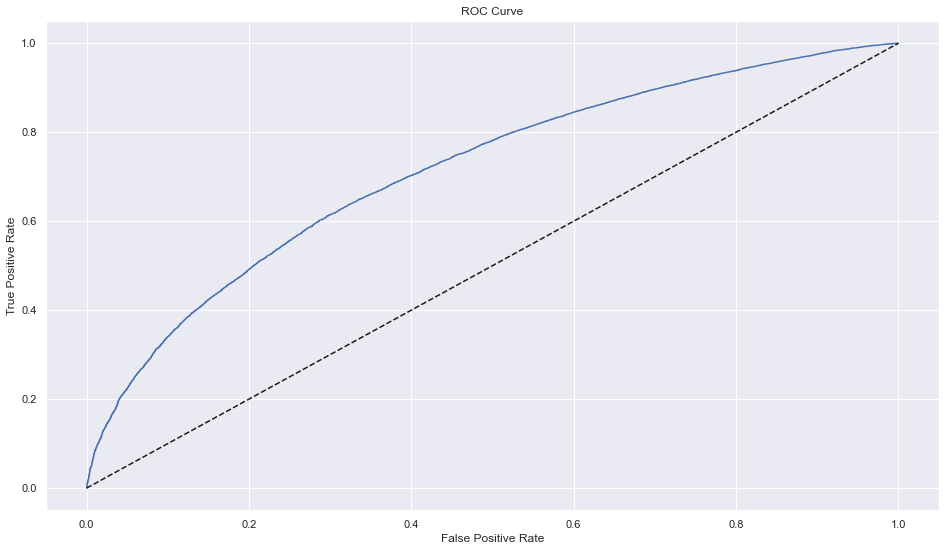

In [27]:
# the result above shows three arrays
# the first one represents the false positive rate
# the second one represents the true positive rate
# the third one shows the thresholds
# therefore for each threshold we know the true positive and false positive rate
# let's extract these arrays into variables for easier manipulation
fpr, tpr, thresholds = metrics.roc_curve(df_pred_proba['Loan_Targets_Test'], 
                                         df_pred_proba['Probability_Non_Default'])

# plot the ROC curve
plt.figure(figsize = (16,9))
plt.plot(fpr, tpr) # ROC curve
plt.plot(fpr, fpr, linestyle = '--', color = 'k') # benchmark (predicting by chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [28]:
# the area under the ROC is called the area under the curve (AUC)
# the area under the curve for predicting by chance is 50%
# accordingly, we can calculate the AUC for the model as well
auroc = metrics.roc_auc_score(df_pred_proba['Loan_Targets_Test'], df_pred_proba['Probability_Non_Default'])
auroc

0.7140794588282589

**Interpretation:**  
- The auc for the model is about 71.4%.
- It is difficult to say if this score is good enough because it mostly depends on our data. However, any model with an auc score comprised between 80%-90% is considered a good model. 
- This model still needs to be tested on real life cases.

Gini and Kolmogorov-Smirnov

In [29]:
# next I used two additional criteria to evaluate the model
# the first is the gini coefficient and the second is the Kolmogorov-Smirnov coefficient
# these two criteria are widely established and widely accepted in the credit risk modeling community
# gini coefficient is a measure of income inequality
# gini here is used for the same purpose, to measure inequality of income between defaulted and non-defaulted borrowers
# the gini coefficient is measured by plotting the cumulative proportion of defaulted borrowers as a function of cumulative proportion of all borrowers
# as a prerequisite, the borrowers must be in ascending order by estimated probability of being good from the PD model
# the second critirion, Kolmogorov-Smirnov coefficient, shows to what extent the model separates good borrowers from bad ones
# it is estimated by calculating the cumulative proportion of good borrowers and bad borrowers with respect to the estimated probabilities of being good and bad
# in other words, this coefficient is the maximum difference between the cumulative distribution functions of good and bad borrowers 
# the greater this difference, the better the model

# in order to plot the gini graph for our data we need to group a dataframe of the targets and probabilities by estimated probabilities in ascending order
df_pred_proba = df_pred_proba.sort_values(by = 'Probability_Non_Default')
df_pred_proba.head() # display the first 5 rows

,Probability_Non_Default,Loan_Targets_Test,y_pred_test
42341,0.3707,1,0
42344,0.3710,1,0
39810,0.3807,0,0
40518,0.4437,0,0
42396,0.4528,0,0


In [30]:
# in order to calculate cumulative proportions, we need to reindex the dataframe is it is sorted now
df_pred_proba = df_pred_proba.reset_index()
df_pred_proba.head()

,index,Probability_Non_Default,Loan_Targets_Test,y_pred_test
0,42341,0.3707,1,0
1,42344,0.3710,1,0
2,39810,0.3807,0,0
3,40518,0.4437,0,0
4,42396,0.4528,0,0


In [31]:
# to make plots for our model's performance criteria, we need:
# 1. the cumulative % of total population;
# 2. the cumulative % of good borrowers;
# 3. the cumulative % of bad borrowers
df_pred_proba['Cumulative N Population'] = df_pred_proba.index + 1
df_pred_proba['Cumulative N Good'] = df_pred_proba['Loan_Targets_Test'].cumsum()
df_pred_proba['Cumulative N Bad'] = df_pred_proba['Cumulative N Population'] - df_pred_proba['Cumulative N Good']
df_pred_proba.head()

,index,Probability_Non_Default,Loan_Targets_Test,y_pred_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,0.3707,1,0,1,1,0
1,42344,0.3710,1,0,2,2,0
2,39810,0.3807,0,0,3,2,1
3,40518,0.4437,0,0,4,2,2
4,42396,0.4528,0,0,5,2,3


In [32]:
# now we calculate the cumulative percentage
df_pred_proba['Cumulative Perc Population'] = df_pred_proba['Cumulative N Population'] / df_pred_proba.shape[0]
df_pred_proba['Cumulative Perc Good'] = df_pred_proba['Cumulative N Good'] / df_pred_proba['Loan_Targets_Test'].sum()
df_pred_proba['Cumulative Perc Bad'] = df_pred_proba['Cumulative N Bad'] / (df_pred_proba.shape[0] - df_pred_proba['Loan_Targets_Test'].sum())
df_pred_proba.head() 

,index,Probability_Non_Default,Loan_Targets_Test,y_pred_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,0.3707,1,0,1,1,0,0.0000,0.0000,0.0000
1,42344,0.3710,1,0,2,2,0,0.0000,0.0000,0.0000
2,39810,0.3807,0,0,3,2,1,0.0000,0.0000,0.0001
3,40518,0.4437,0,0,4,2,2,0.0000,0.0000,0.0002
4,42396,0.4528,0,0,5,2,3,0.0001,0.0000,0.0003


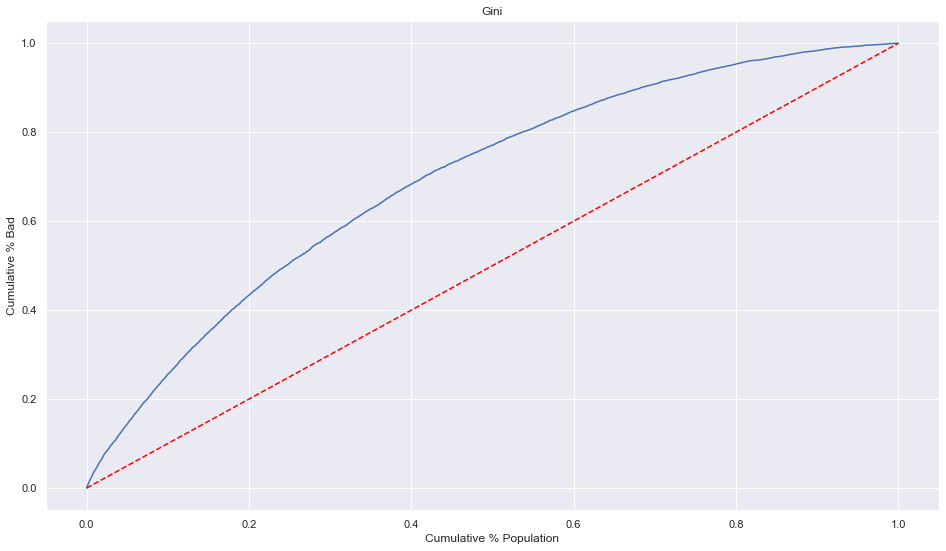

In [33]:
# now we have everything we need to plot the gini graph
plt.figure(figsize = (16,9))
plt.plot(df_pred_proba['Cumulative Perc Population'], df_pred_proba['Cumulative Perc Bad'])
plt.plot(df_pred_proba['Cumulative Perc Population'], df_pred_proba['Cumulative Perc Population'],
         linestyle = '--', color = 'red')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')
plt.show()

In [34]:
# the gini coefficient is the proprtion of the area enclosed by the diagonal red line and the gini blue curve
# there is an analytical formula to calculate gini
# gini can be expressed by the auroc and vice versa
# formula: gini = auroc * 2 - 1
gini = auroc * 2 - 1
gini

0.4281589176565177

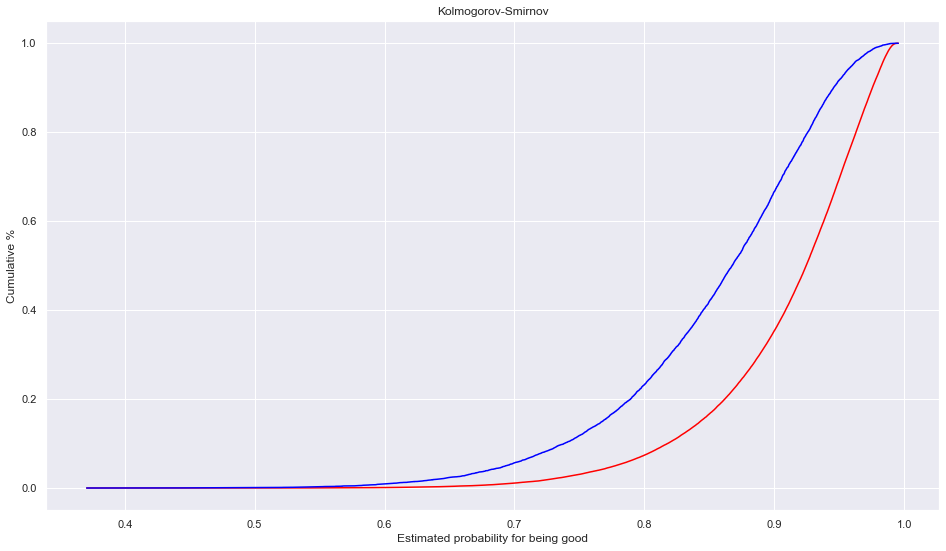

In [35]:
# the gini value is about 43%
# let's calculate the second measure: Kolmogorov-Smirnov coefficient
# again, this coefficient is the maximum difference between the cumulative distribution functions of good and bad borrowers
# for a perfect model, the maximum distance K-S is equal to 1
# but when predicting by chance, there is almost no distance, K-S = 0
# we need to plot the cumulative functions of good borrowers and bad borrowers with estimated probability of being a good borrower
plt.figure(figsize = (16,9))
plt.plot(df_pred_proba['Probability_Non_Default'], df_pred_proba['Cumulative Perc Good'], color = 'red')
plt.plot(df_pred_proba['Probability_Non_Default'], df_pred_proba['Cumulative Perc Bad'], color = 'blue')
plt.xlabel('Estimated probability for being good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')
plt.show()

In [36]:
# the maximum of the "Kolmogorov-Smirnov" criterion is the distance between the red and blue curve
# it can also be caclulated from the dataframe containing the cumulative proportions
KS = max(df_pred_proba['Cumulative Perc Bad'] - df_pred_proba['Cumulative Perc Good'])
KS

0.315151349676221

The two cumulative distribution functions are sufficiently far away from each other and the model has satisfactory predictive power. 

### **Applying the PD model for decision making**

**Creating a scorecard**  
A scorecard is meant to convert the PD model into a simplified version that produces an individual credit worthiness assessment that specifically corresponds to a specific probability of default. These credit worthiness assessments are called credit scores. We are going to create a scorecard based on our PD model.  

In [37]:
# recall that we stored the coefficients of our PD model in dataframe "summary_table"
# it contains regression coefficients for all independant dummy variables except for the reference categories
# the reference categories were not included when estimating the model
# with a scorecard we want to be as interepetable as possible, thus we'll show these reference categories in the scorecard
# let's show the reference categories 
ref_cat

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Source Verified',
 'purpose:educ_smb_wedd_renen_mov_house',
 'initial_list_status:f',
 'term:60',
 'emp_length_int:0',
 'mth_issue_date:>84',
 'int_rate: > 20.281',
 'mth_since_earliest_cr_line:<140',
 'inq_last_6mths: > 6',
 'total_acc:<=27',
 'annual_inc:<20K',
 'dti: > 35',
 'mths_since_last_record: 0-2',
 'mths_since_last_delinq:0-3']

In [38]:
# store these reference categories in a dataframe
df_ref_cat = pd.DataFrame(data = ref_cat, columns = ['Feature Name'])

# the reference categories were taken as zeros when we calculated the probability of default
# let's create a column named "Coefficients" that contains only zeros
df_ref_cat['Coefficients'] = 0

# let's create a thirs column named "P_Values" that contains null values
df_ref_cat['P_Values'] = np.nan

# display the dataframe
df_ref_cat

,Feature Name,Coefficients,P_Values
0,grade:G,0,nan
1,home_ownership:RENT_OTHER_NONE_ANY,0,nan
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,nan
3,verification_status:Source Verified,0,nan
4,purpose:educ_smb_wedd_renen_mov_house,0,nan
5,initial_list_status:f,0,nan
6,term:60,0,nan
7,emp_length_int:0,0,nan
8,mth_issue_date:>84,0,nan
9,int_rate: > 20.281,0,nan


In [39]:
# now we concatenate this dataframe with the "summary_table" dataframe
df_scorecard = pd.concat([summary_table, df_ref_cat], axis = 0)

# reset the index 
df_scorecard = df_scorecard.reset_index()

# display the df_score_card daaframe
df_scorecard

,index,Feature Name,Coefficients,P_Values
0,0,Intercept,-1.3940,0.0524
1,1,grade:A,1.1189,nan
2,2,grade:B,0.9158,0.0000
3,3,grade:C,0.7177,0.0000
4,4,grade:D,0.5285,0.0000
5,5,grade:E,0.3386,0.0000
6,6,grade:F,0.1382,0.0000
7,7,home_ownership:OWN,0.0804,0.0067
8,8,home_ownership:MORTGAGE,0.0883,0.0002
9,9,addr_state:NM_VA,0.0359,0.0000


In [40]:
# we'll get the output from the PD model as if we had included the reference categories in the model estimation and had coefficients of 0
# let's now add a new column that contains the name of the original variable
df_scorecard['Original Feature Name'] = df_scorecard['Feature Name'].str.split(':').str[0]

# display the "df_scorecard" dataframe
df_scorecard

,index,Feature Name,Coefficients,P_Values,Original Feature Name
0,0,Intercept,-1.3940,0.0524,Intercept
1,1,grade:A,1.1189,nan,grade
2,2,grade:B,0.9158,0.0000,grade
3,3,grade:C,0.7177,0.0000,grade
4,4,grade:D,0.5285,0.0000,grade
5,5,grade:E,0.3386,0.0000,grade
6,6,grade:F,0.1382,0.0000,grade
7,7,home_ownership:OWN,0.0804,0.0067,home_ownership
8,8,home_ownership:MORTGAGE,0.0883,0.0002,home_ownership
9,9,addr_state:NM_VA,0.0359,0.0000,addr_state


In [41]:
# in order to create a scorecard, we need to turn the regression coefficients from our PD model into simple scores
# first, we must decide the minimum and the maximum score
# let:
# minimum score = 300, maximum score = 850
min_score = 300
max_score = 850

# second, we must rescale the credit worthiness assessment produced by our model to the desired credit score
# to achieve that, we also need the minimum and maximum of the credt worthiness assessments that can be obtained from the PD model
# the minimum credit assessment is reached when a borrower falls into the categories of the original independant variable with lowest coefficientss
# similarly, the maximum credit assessment is reached when a borrower falls into the categories of the original independant variable with highest coefficients 
# let's find this minimum and maximum

In [42]:
df_scorecard.groupby('Original Feature Name')['Coefficients'].min()

Original Feature Name
Intercept                    -1.3940
addr_state                    0.0000
annual_inc                   -0.0267
dti                          -0.0155
emp_length_int                0.0000
grade                         0.0000
home_ownership                0.0000
initial_list_status           0.0000
inq_last_6mths                0.0000
int_rate                      0.0000
mth_issue_date               -0.0691
mth_since_earliest_cr_line    0.0000
mths_since_last_delinq        0.0000
mths_since_last_record        0.0000
purpose                       0.0000
term                          0.0000
total_acc                    -0.0410
verification_status           0.0000
Name: Coefficients, dtype: float64

In [43]:
# the result above shows the minimum coefficients for each original independant variable
# most of this minimum values are zeros or almost zeros as we intended 
# there is one exception with the "addr_state" variable
# so the minimum possible credit worthiness assessment corresponds to the sum of these minimum values
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum() 
min_sum_coef

-1.5464276769809608

In [44]:
# the value is about -1.27
# let's now get the maximum values of the coefficients for each original independant variable
df_scorecard.groupby('Original Feature Name')['Coefficients'].max()

Original Feature Name
Intercept                    -1.3940
addr_state                    0.5137
annual_inc                    0.6343
dti                           0.2991
emp_length_int                0.1272
grade                         1.1189
home_ownership                0.0883
initial_list_status           0.0614
inq_last_6mths                0.6931
int_rate                      0.9057
mth_issue_date                1.5006
mth_since_earliest_cr_line    0.1360
mths_since_last_delinq        0.1507
mths_since_last_record        0.5566
purpose                       0.3385
term                          0.0694
total_acc                     0.0230
verification_status           0.0932
Name: Coefficients, dtype: float64

In [45]:
# analogically, the maximum possible credit worthiness assessment corresponds to the sum of these maximum values
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum() 
max_sum_coef

5.915649534141826

In [46]:
# the value is about 5.91
# now we need to rescale these coefficients to scores 
# this formula is used: variable_score = variable_coef * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) 
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

# dispay the "df_scorecard" dataframe
df_scorecard

,index,Feature Name,Coefficients,P_Values,Original Feature Name,Score - Calculation
0,0,Intercept,-1.3940,0.0524,Intercept,-102.7478
1,1,grade:A,1.1189,nan,grade,82.4663
2,2,grade:B,0.9158,0.0000,grade,67.4967
3,3,grade:C,0.7177,0.0000,grade,52.8983
4,4,grade:D,0.5285,0.0000,grade,38.9537
5,5,grade:E,0.3386,0.0000,grade,24.9599
6,6,grade:F,0.1382,0.0000,grade,10.1858
7,7,home_ownership:OWN,0.0804,0.0067,home_ownership,5.9231
8,8,home_ownership:MORTGAGE,0.0883,0.0002,home_ownership,6.5049
9,9,addr_state:NM_VA,0.0359,0.0000,addr_state,2.6463


In [47]:
# everything looks great except for the very low value corresponding the intercept
# this is because the intercept is not a dummy variable 
# the score corresponding to the intercept is very close to the minimum score in the worst case scenario
# what we want to get is a value around our minimum desired score, which is 300
# there is another equation that can help us get the score corresponding to the intercept
# intercept_score = ((intercept_coef - min_score) / (max_sum_coef - min_sum_coef)) * (max_score - min_core) + min_score
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_score) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score 

# display the "df_scorecard" dataframe
df_scorecard

<ipython-input-47-42fdc2a6c458>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_score) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature Name,Coefficients,P_Values,Original Feature Name,Score - Calculation
0,0,Intercept,-1.3940,0.0524,Intercept,-21914.5533
1,1,grade:A,1.1189,nan,grade,82.4663
2,2,grade:B,0.9158,0.0000,grade,67.4967
3,3,grade:C,0.7177,0.0000,grade,52.8983
4,4,grade:D,0.5285,0.0000,grade,38.9537
5,5,grade:E,0.3386,0.0000,grade,24.9599
6,6,grade:F,0.1382,0.0000,grade,10.1858
7,7,home_ownership:OWN,0.0804,0.0067,home_ownership,5.9231
8,8,home_ownership:MORTGAGE,0.0883,0.0002,home_ownership,6.5049
9,9,addr_state:NM_VA,0.0359,0.0000,addr_state,2.6463


In [48]:
# now let's round the results obtained in the "Score - Calculation" column
df_scorecard['Score - Final'] = df_scorecard['Score - Calculation'].round()

# display the "df_scorecard" dataframe
df_scorecard

,index,Feature Name,Coefficients,P_Values,Original Feature Name,Score - Calculation,Score - Final
0,0,Intercept,-1.3940,0.0524,Intercept,-21914.5533,-21915.0000
1,1,grade:A,1.1189,nan,grade,82.4663,82.0000
2,2,grade:B,0.9158,0.0000,grade,67.4967,67.0000
3,3,grade:C,0.7177,0.0000,grade,52.8983,53.0000
4,4,grade:D,0.5285,0.0000,grade,38.9537,39.0000
5,5,grade:E,0.3386,0.0000,grade,24.9599,25.0000
6,6,grade:F,0.1382,0.0000,grade,10.1858,10.0000
7,7,home_ownership:OWN,0.0804,0.0067,home_ownership,5.9231,6.0000
8,8,home_ownership:MORTGAGE,0.0883,0.0002,home_ownership,6.5049,7.0000
9,9,addr_state:NM_VA,0.0359,0.0000,addr_state,2.6463,3.0000


In [49]:
# let's check if the minimum possible score and the maximum possible score are equal to the desired minimum and maximum scores
min_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original Feature Name')['Score - Final'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

-21926.0
-21375.0


In [50]:
# we see that the values don't correspond to the the minimum and maximum scores
# this may be due to data that needs to be reviewed,
# in a perfect world we are supposed to get the same values  

**Calculating credit score**

In [51]:
# to calculate the credit score of a borrower we only have to sum the credit scores corresponding to the respective dummy variables categories
# we simply multiply the values of the dummy variables which are only zeroes and ones by the respective scores
# first we yield the intercept score for all observations
inputs_test_ref_cat_w_intercept = inputs_test_with_ref_cat

# add a new column to the dataframe
inputs_test_ref_cat_w_intercept.insert(0, 'Intercept', 1)

# display the first 5 rows of the dataframe
inputs_test_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,addr_state:NY,addr_state:CA,addr_state:TX,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ_smb_wedd_renen_mov_house,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:majorpurch_car_homeimpr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mth_issue_date:<38,mth_issue_date:38-39,mth_issue_date:40-41,mth_issue_date:42-48,mth_issue_date:49-52,mth_issue_date:53-64,mth_issue_date:65-84,mth_issue_date:>84,int_rate: < 9.548,int_rate:9.548 - 12.025,int_rate:12.025 - 15.74,int_rate:15.74 - 20.281,int_rate: > 20.281,mth_since_earliest_cr_line:<140,mth_since_earliest_cr_line:141-164,mth_since_earliest_cr_line:165-247,mth_since_earliest_cr_line:248-270,mth_since_earliest_cr_line:271-352,mth_since_earliest_cr_line:>352,inq_last_6mths: 0,inq_last_6mths: 1-2,inq_last_6mths: 3-6,inq_last_6mths: > 6,total_acc:<=27,total_acc:28-51,total_acc:>=52,mths_since_last_record: Missing,mths_since_last_record: 0-2,mths_since_last_record: 3-20,mths_since_last_record: 21-31,mths_since_last_record: 32-80,mths_since_last_record: 81-86,mths_since_last_record: > 86,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti: <= 1.4,dti: 1.4-3.5,dti: 3.5-7.7,dti: 7.7-10.5,dti: 10.5-16.1,dti: 16.1-20.3,dti: 20.3-21.7,dti: 21.7-22.4,dti: 22.4-35,dti: > 35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [52]:
# we need to make sure that the columns are arranged in the same order as the credit score dataframe
inputs_test_ref_cat_w_intercept = inputs_test_ref_cat_w_intercept[df_scorecard['Feature Name'].values]

# store the "Score - Final" column in a new variable
scorecard_scores = df_scorecard['Score - Final']

# we also have to make sure that the two variables have the same dimensions
print(inputs_test_ref_cat_w_intercept.shape)
print(scorecard_scores.shape)

(93257, 103)
(103,)


In [53]:
# the first dataframe has a number of columns equal to the number of rows in the second dataframe
# we need to reshape the "scorecard_scores dataframe" so it can have 103 rows and 1 column
scorecard_scores = scorecard_scores.values.reshape(103, 1)
 
# hceck the shape again
scorecard_scores.shape

(103, 1)

In [54]:
# now we can safely multiply the test dataframe by the scores
# we want to multiply each row from the test data by the column with the scores and then sum the products
y_scores = inputs_test_ref_cat_w_intercept.dot(scorecard_scores)

# display the first rows of "y_scores"
y_scores.head()

,0
362514,-21610.0000
288564,-21657.0000
213591,-21660.0000
263083,-21577.0000
165001,-21555.0000


In [55]:
y_scores.shape

(93257, 1)

**From credit score to PD**

In [56]:
# if want to take a credit score and turn it into a probability of default, we can use the formula below:
sum_of_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

# now we take the exponetial of the result and devide by the same expenential plus 1
y_pred_proba_from_score = np.exp(sum_of_coef_from_score) / (np.exp(sum_of_coef_from_score) + 1)

**Setting cut-offs**

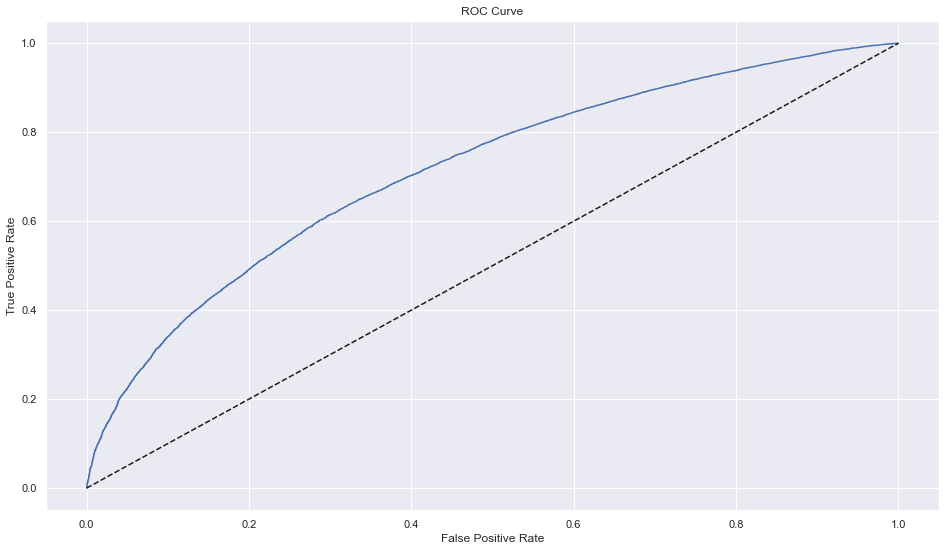

In [57]:
# the cut-off rate is used for taking a decision whether to approve a loan application or not
# if we set a probability of default as a cut-off, all borrowers with probability of default lower than the cut-off will be granted a loan,
# analogically, all borrowers with a higher probability of default will be rejected
# one thing worth mentioning is that a specific cut-off when it's chosen has two major implications:
# 1. it predetermines the total number of borrowers that will be approved and rejected
# 2. it impacts the quality of the loans the bank would grant
# there is a tradoff between the two
# if we want to grant more loans we will be accepting more lower quality borrowers
# but if we want only high quality borrowers we will end up with fewer loans
# in order to choose our cut-off let's examine the ROC curve again
fpr, tpr, thresholds = metrics.roc_curve(df_pred_proba['Loan_Targets_Test'], 
                                         df_pred_proba['Probability_Non_Default'])

# plot the ROC curve
plt.figure(figsize = (16,9))
plt.plot(fpr, tpr) # ROC curve
plt.plot(fpr, fpr, linestyle = '--', color = 'k') # benchmark (predicting by chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [58]:
# let's also visulaize the thresholds again
thresholds

array([1.99544919, 0.99544919, 0.99406791, ..., 0.47806475, 0.38070881,
       0.370726  ])

In [59]:
thresholds.shape

(15514,)

In [60]:
# let's now concatenate the thresholds, the true postive rate and false positive rate
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

# assign column names
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

# display the first five rows 
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.9954,0.0000,0.0000
1,0.9954,0.0000,0.0000
2,0.9941,0.0000,0.0001
3,0.9940,0.0001,0.0001
4,0.9931,0.0001,0.0006


In [61]:
# the thresholds are in descending order
# the roc method sets the first theshold where nothing can be predicted
# we can see that the first row has the highest threshold value and not very useful
# we can transform it and set it to a probability close to 1
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)

# display the first five rows 
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.0000,0.0000,0.0000
1,0.9954,0.0000,0.0000
2,0.9941,0.0000,0.0001
3,0.9940,0.0001,0.0001
4,0.9931,0.0001,0.0006


In [62]:
# now let's see the approval and rejection rates for each possible cut-off
# approval rate = number of approved / total
# rejection rate = number of rejected / total
# rejection rate = 1 - approval rate
# let's create a function that calculates the number of approved borrowers for a given threshold
# this function returns the number of borrowers for which the predicted probability is >= p
def n_approved(p):
  return np.where(df_pred_proba['Probability_Non_Default'] >= p, 1, 0).sum()

In [63]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_pred_proba['Probability_Non_Default'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_pred_proba['Probability_Non_Default'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

# display the first five rows
df_cutoffs.head()

,thresholds,fpr,tpr,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.0000,0.0000,0.0000,0,93257,0.0000,1.0000
1,0.9954,0.0000,0.0000,1,93256,0.0000,1.0000
2,0.9941,0.0000,0.0001,11,93246,0.0001,0.9999
3,0.9940,0.0001,0.0001,12,93245,0.0001,0.9999
4,0.9931,0.0001,0.0006,55,93202,0.0006,0.9994


In [64]:
# display the last five rows
df_cutoffs.tail()

,thresholds,fpr,tpr,N Approved,N Rejected,Approval Rate,Rejection Rate
15509,0.4842,0.9993,1.0000,93248,9,0.9999,0.0001
15510,0.4814,0.9996,1.0000,93250,7,0.9999,0.0001
15511,0.4781,0.9996,1.0000,93251,6,0.9999,0.0001
15512,0.3807,1.0000,1.0000,93255,2,1.0000,0.0000
15513,0.3707,1.0000,1.0000,93257,0,1.0000,0.0000


In [65]:
df_cutoffs.iloc[5000:6000, ]

,thresholds,fpr,tpr,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.9078,0.2918,0.6054,53631,39626,0.5751,0.4249
5001,0.9077,0.2918,0.6056,53640,39617,0.5752,0.4248
5002,0.9077,0.2920,0.6056,53642,39615,0.5752,0.4248
5003,0.9077,0.2920,0.6056,53649,39608,0.5753,0.4247
5004,0.9077,0.2921,0.6056,53650,39607,0.5753,0.4247
5005,0.9077,0.2921,0.6059,53669,39588,0.5755,0.4245
5006,0.9077,0.2922,0.6059,53670,39587,0.5755,0.4245
5007,0.9077,0.2922,0.6059,53673,39584,0.5755,0.4245
5008,0.9077,0.2923,0.6059,53674,39583,0.5755,0.4245
5009,0.9077,0.2923,0.6060,53681,39576,0.5756,0.4244


**Analysis**  
Let's assume the highest level of probability we'd accept is 10%. In other words, the lowest probability of being good is 90%. With this cutoff we will end up with about 62% of approval rate and 38% of rejection rate.

In [66]:
# finally let's store the "inputs_train_with_ref_cat", "inputs_test_with_ref_cat" and "df_scorecard" dataframe into csv files for further processing
inputs_train_with_ref_cat.to_csv('C:/Users/Aylan/Documents/IT/Datasets/inputs_train_with_ref_cat.csv')
inputs_test_with_ref_cat.to_csv('C:/Users/Aylan/Documents/IT/Datasets/inputs_test_with_ref_cat.csv')
df_scorecard.to_csv('C:/Users/Aylan/Documents/IT/Datasets/df_scorecard.csv') 

In [67]:
# let's also save the PD model
pickle.dump(reg2, open('C:/Users/Aylan/Documents/IT/Datasets/PD_model.sav', 'wb'))